Для данных об объемах пассажирских авиаперевозок в Австралии (файл ausair.csv)
постройте модель простого экспоненциального сглаживания (модель Брауна).
Получите прогноз на 10 лет вперед. Отобразите на графике аппроксимацию исходного
ряда и полученный прогноз.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
passengers = pd.read_csv('ausair.csv', index_col='Year', parse_dates=True)

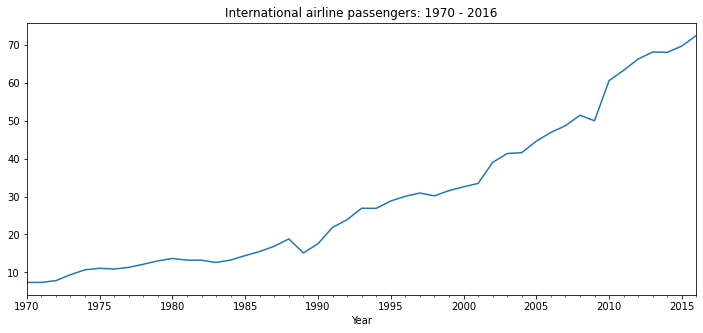

In [3]:
passengers['Passengers'].plot(figsize=(12,5))
plt.title('International airline passengers: 1970 - 2016')
plt.show()

In [4]:
date_start=passengers.index[-1]+pd.DateOffset(years=1) #формируем столбец новых дат с 2017-2027
date_end=date_start+pd.DateOffset(years=10)
dates=pd.date_range(date_start,date_end,freq='YS')
new_dates=pd.DataFrame(dates)
new_dates.columns=['date']
new_dates=new_dates.set_index('date')

nn = np.empty(11) # строки с 2017-2027 заполним nan
nn.fill(np.nan)
new_df = pd.concat([passengers, new_dates]) #объединяем в единый DataFrame

In [5]:
a=0.8#параметр слаживания 

In [6]:
y=passengers['Passengers'].values
len_y=len(y)
l=[]
l.append(y[0])
for i in range(1,len_y):#сглаживаем имеющиеся данные по 2016 год
    k=l[-1]+a*(y[i]-l[-1])
    l.append(k)
    
for i in range(11):#прогнозируем
    y=np.append(y,l[-1])
    l.append(a*y[-1]+(1-a)*l[-1]) 
    
new_df['expon']=y
new_df['approcs']=l

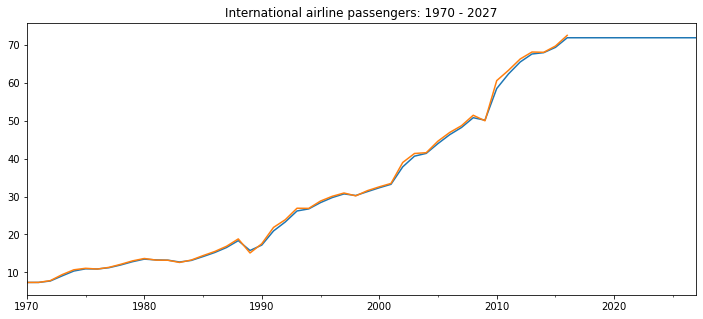

In [7]:
new_df['approcs'].plot(figsize=(12,5)) #отрисовываем
new_df['Passengers'].plot(figsize=(12,5)) 
plt.title('International airline passengers: 1970 - 2027')
plt.show()